In [2]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
import py3Dmol
import pandas as pd

RDKit WARNING: [08:37:53] Enabling RDKit 2019.09.2 jupyter extensions


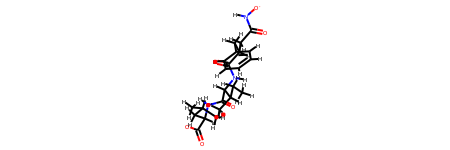

In [4]:
# read molecule
suppl = Chem.SDMolSupplier('./sdf/platinum_dataset_2017_01.sdf', removeHs=False)
mols = [x for x in suppl if x is not None]
# len(mols)

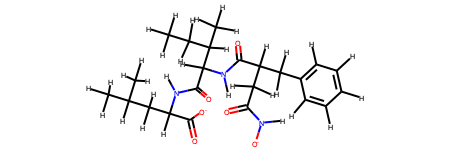

In [10]:
mol = mols[0]
smtest = Chem.MolToSmiles(mol)
mtest = Chem.MolFromSmiles(smtest)
m_htest = Chem.AddHs(mtest)
m_htest

In [11]:
def conf_generation(mol, numConfs, rms):
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    num_of_confs = []
    for i in rms:
        confids = AllChem.EmbedMultipleConfs(m_h, numConfs=numConfs, randomSeed=1234, pruneRmsThresh=i, numThreads=0)
        num_of_confs.append((i, len(confids)))
    
    return num_of_confs

rms = [0.5, 1.0, 1.5, 2.0]
num_of_confs = conf_generation(mol, 1000, rms)

In [13]:
for i in num_of_confs:
    print(i)

(0.5, 1000)
(1.0, 998)
(1.5, 843)
(2.0, 265)


In [ ]:
def mm_opt(mol, ff)